# Бинарная классификация отраженных сигналов радара



# Цель
Реализовать классификацию между камнями (R) и металлическими цилиндрами (M) на основе данных об отражении сигналов радара от поверхностей.
60 входных значений показывают силу отражаемого сигнала под определенным углом.
Входные данные нормализованы и находятся в промежутке от 0 до 1.

# Задачи

* Ознакомиться с задачей бинарной классификации
* Загрузить данные
* Создать модель ИНС в tf.Keras
* Настроить параметры обучения
* Обучить и оценить модель
* Изменить модель и провести сравнение. Объяснить результатыь

# Выполнение работы


### Подключение модулей

In [1]:
import pandas
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

### Загрузка данных

Чтение данных из базы

In [2]:
dataframe = pandas.read_csv("sonar.csv", header=None)

Примерный вид базы

In [3]:
dataframe.head() #по дефолту 4

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Создаем копию массива с Numpy-представление

In [4]:
dataset = dataframe.values 

X = dataset[:,0:60].astype(float) #переводим в нужный формат
Y = dataset[:,60]

### Переход от текстовых меток к категориальному вектору

In [5]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

### Создание модели нейронной сети

Определим последовательность модели нейронной сети (от меньшего к большему)

In [6]:
model = Sequential()

Добавление слоя модели с использованием функции активации ReLu (возвращает значение х, если х положительно, иначе 0)

In [7]:
model.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))

Добавление слоя модели с использованием функции активации sigmoid (Для малых значений (<-5) sigmoid возвращает значение, близкое к нулю, а для больших значений (>5) результат функции приближается к 1.
Сигмоид эквивалентен двухэлементному Softmax, где второй элемент считается равным нулю. Сигмовидная функция всегда возвращает значение от 0 до 1.)

In [8]:
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

### Добавим параметров к обчению

1. оптимизатор — механизм, с помощью которого сеть будет обновлять себя, опираясь на наблюдаемые данные и функцию потерь;
2. функцию потерь, которая определяет, как сеть должна оценивать качество своей работы на обучающих
3. метрики для мониторинга на этапах обучения и тестирования — здесь нас будет интересовать только точность (доля правильно классифицированных изображений)

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

### Добавим адаптации модели под обучающие данные

In [10]:
d = model.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 13s 30ms/step - loss: 0.6924 - accuracy: 0.5615 - val_loss: 0.6963 - val_accuracy: 0.2857
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6839 - accuracy: 0.6845 - val_loss: 0.6907 - val_accuracy: 0.4762
Epoch 3/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6745 - accuracy: 0.6898 - val_loss: 0.6964 - val_accuracy: 0.3810
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6611 - accuracy: 0.7380 - val_loss: 0.7054 - val_accuracy: 0.3333
Epoch 5/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.7112 - val_loss: 0.7178 - val_accuracy: 0.3333
Epoch 6/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6256 - accuracy: 0.7380 - val_loss: 0.6994 - val_accuracy: 0.3810
Epoch 7/100
19/19 [==============================] - 0s 14ms/step - loss: 0.6031 - accuracy: 0.7326 - val_loss: 0.7346 - val_accuracy: 0.3333
Epoch 8/

19/19 [==============================] - 0s 10ms/step - loss: 0.3643 - accuracy: 0.8289 - val_loss: 0.4685 - val_accuracy: 0.7143
Epoch 59/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3601 - accuracy: 0.8449 - val_loss: 0.4154 - val_accuracy: 0.7619
Epoch 60/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3615 - accuracy: 0.8342 - val_loss: 0.3871 - val_accuracy: 0.8095
Epoch 61/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3569 - accuracy: 0.8556 - val_loss: 0.4603 - val_accuracy: 0.7143
Epoch 62/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3589 - accuracy: 0.8396 - val_loss: 0.4202 - val_accuracy: 0.7619
Epoch 63/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3537 - accuracy: 0.8556 - val_loss: 0.4324 - val_accuracy: 0.7619
Epoch 64/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3517 - accuracy: 0.8717 - val_loss: 0.3844 - val_accuracy: 0.8095
Epoch 65/100
19/

Собирем значения для отрисовки

In [11]:
y10 = d.history["loss"]
y20 = d.history["accuracy"]

### Выполнение дополнительных требований для для изучения

Создадим точно такую же модель нейроной сети, но уменьшим размер входного слоя в два раза и сравним с результатом первоначальной архитектуры

In [12]:
model1 = Sequential()

model1.add(Dense(30, input_dim=60, kernel_initializer='normal', activation='relu'))
model1.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model1.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

d1 = model1.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 16ms/step - loss: 0.6933 - accuracy: 0.4759 - val_loss: 0.6902 - val_accuracy: 0.9048
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6907 - accuracy: 0.5134 - val_loss: 0.6983 - val_accuracy: 0.1905
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6871 - accuracy: 0.6845 - val_loss: 0.6951 - val_accuracy: 0.3810
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.6952 - val_loss: 0.6823 - val_accuracy: 0.8095
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6770 - accuracy: 0.6684 - val_loss: 0.7119 - val_accuracy: 0.1905
Epoch 6/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6667 - accuracy: 0.6952 - val_loss: 0.6809 - val_accuracy: 0.6190
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6552 - accuracy: 0.7059 - val_loss: 0.7038 - val_accuracy: 0.3810
Epoch 8

19/19 [==============================] - 0s 9ms/step - loss: 0.3922 - accuracy: 0.8235 - val_loss: 0.5312 - val_accuracy: 0.6667
Epoch 59/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3952 - accuracy: 0.8128 - val_loss: 0.4608 - val_accuracy: 0.7619
Epoch 60/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3926 - accuracy: 0.8128 - val_loss: 0.4526 - val_accuracy: 0.7619
Epoch 61/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3899 - accuracy: 0.8182 - val_loss: 0.4783 - val_accuracy: 0.7619
Epoch 62/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3905 - accuracy: 0.8235 - val_loss: 0.4927 - val_accuracy: 0.7143
Epoch 63/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3884 - accuracy: 0.8235 - val_loss: 0.4588 - val_accuracy: 0.7619
Epoch 64/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3872 - accuracy: 0.8235 - val_loss: 0.5110 - val_accuracy: 0.7143
Epoch 65/100
19/

Отрисуем получившиеся значения

In [13]:
y11 = d1.history["loss"]
y21 = d1.history["accuracy"]

Возьмем изначальную модель и добавим промежуточный(скрытый) слой Dense в архитектуру сети с 30 нейронами.

In [14]:
model2 = Sequential()

model2.add(Dense(60, input_dim=60, kernel_initializer='normal', activation='relu'))
model2.add(Dense(15, kernel_initializer='normal', activation='relu'))
model2.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model2.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

d2 = model2.fit(X, encoded_Y, epochs=100, batch_size=10, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 18ms/step - loss: 0.6932 - accuracy: 0.5134 - val_loss: 0.6986 - val_accuracy: 0.0000e+00
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6922 - accuracy: 0.5187 - val_loss: 0.7025 - val_accuracy: 0.0000e+00
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6908 - accuracy: 0.5187 - val_loss: 0.7063 - val_accuracy: 0.0000e+00
Epoch 4/100
19/19 [==============================] - 0s 11ms/step - loss: 0.6883 - accuracy: 0.5187 - val_loss: 0.7138 - val_accuracy: 0.0000e+00
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6834 - accuracy: 0.6150 - val_loss: 0.7326 - val_accuracy: 0.0000e+00
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6738 - accuracy: 0.6203 - val_loss: 0.7179 - val_accuracy: 0.1905
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 0.6599 - accuracy: 0.7005 - val_loss: 0.7692 - val_acc

19/19 [==============================] - 0s 10ms/step - loss: 0.3353 - accuracy: 0.8503 - val_loss: 0.3835 - val_accuracy: 0.8095
Epoch 59/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3371 - accuracy: 0.8503 - val_loss: 0.4488 - val_accuracy: 0.7619
Epoch 60/100
19/19 [==============================] - 0s 11ms/step - loss: 0.3331 - accuracy: 0.8503 - val_loss: 0.4043 - val_accuracy: 0.8095
Epoch 61/100
19/19 [==============================] - 0s 11ms/step - loss: 0.3292 - accuracy: 0.8556 - val_loss: 0.3910 - val_accuracy: 0.8095
Epoch 62/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3357 - accuracy: 0.8503 - val_loss: 0.4718 - val_accuracy: 0.7619
Epoch 63/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3404 - accuracy: 0.8556 - val_loss: 0.4262 - val_accuracy: 0.8095
Epoch 64/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3282 - accuracy: 0.8503 - val_loss: 0.3944 - val_accuracy: 0.8095
Epoch 65/100

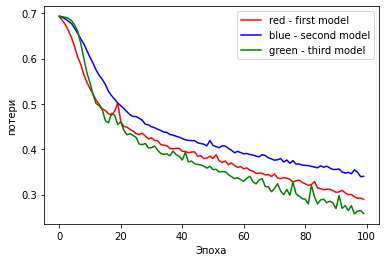

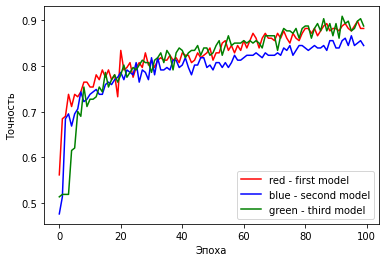

In [15]:
y12 = d2.history["loss"]
y22 = d2.history["accuracy"]
x = [x for x in range(100)]
plt.ylabel("потери")
plt.xlabel("Эпоха")
plt.plot(x, y10, color="red")
plt.plot(x, y11, color="blue")
plt.plot(x, y12, color="green")
plt.legend(['red - first model','blue - second model','green - third model'])
plt.show()
plt.ylabel("Точность")
plt.xlabel("Эпоха")
plt.plot(x, y20, color="red")
plt.plot(x, y21, color="blue")
plt.plot(x, y22, color="green")
plt.legend(['red - first model','blue - second model','green - third model'])
plt.show()

Если мы от изначальной модели уменьшим кол-во изначальных нейронов, то увеличится кол-во потерь и и уменьшится точность. А если к изначальной модели добавим скрытый слой, то количество потерй снизится, а точность возрастет. 